# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday Sep 20, 2021 at 11:59pm**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [2]:
spotify_df = pd.read_csv("spotify.csv", index_col = 0)
spotify_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)
print("We have %d training examples and %d testing examples" %(df_train.shape[0], df_test.shape[0]))


We have 1613 training examples and 404 testing examples


#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [4]:
train_des = df_train.describe()
train_min = train_des.iloc[3]
train_max = train_des.loc["max"]
train_diff = train_max - train_min
train_diff = train_diff.sort_values()

print(train_des) #description on training split
print("The %s feature has the smallest range of %.3f" %(train_diff.index[0], train_diff[0])) #finding feature with smallest range

       acousticness  danceability   duration_ms       energy  \
count   1613.000000   1613.000000  1.613000e+03  1613.000000   
mean       0.185067      0.620076  2.462533e+05     0.681315   
std        0.255838      0.161152  8.056740e+04     0.206964   
min        0.000003      0.148000  1.604200e+04     0.015600   
25%        0.010000      0.514000  1.999040e+05     0.564000   
50%        0.062600      0.634000  2.298590e+05     0.712000   
75%        0.260000      0.739000  2.703330e+05     0.841000   
max        0.994000      0.984000  1.004627e+06     0.997000   

       instrumentalness          key     liveness     loudness         mode  \
count       1613.000000  1613.000000  1613.000000  1613.000000  1613.000000   
mean           0.134317     5.384377     0.191317    -7.095272     0.619343   
std            0.274217     3.653722     0.156071     3.678993     0.485699   
min            0.000000     0.000000     0.018800   -31.082000     0.000000   
25%            0.000000     

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [5]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

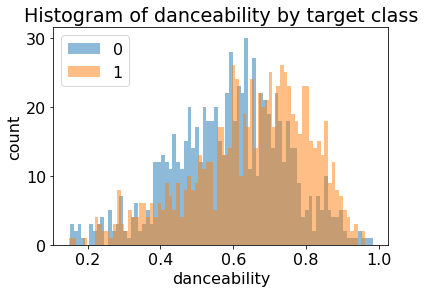

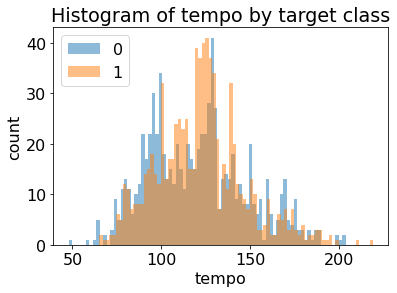

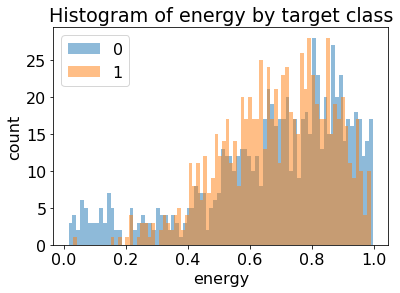

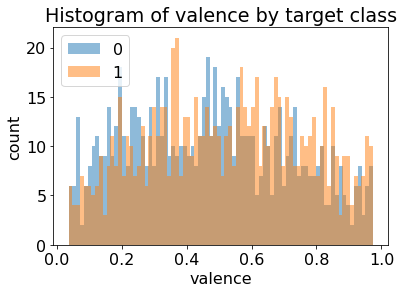

In [6]:
feature_list = ["danceability", "tempo", "energy", "valence"]
for i in feature_list:
    plt.hist(negative_examples[i], bins = 80, alpha = 0.5, label = "0")
    plt.hist(positive_examples[i], bins = 80, alpha = 0.5, label = "1")
    plt.legend(loc = "upper left")
    plt.xlabel(i)
    plt.ylabel("count")
    plt.title("Histogram of %s by target class" %i)
    plt.show()

#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

**A reasonable split would be to predict 0 if danceability is < 0.7 (and predict 1 otherwise) because there is a relatively large separation between the liked and disliked songs at 0.7 danceability where people tend to dislike songs at < 0.7 danceability.**

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



**Having a feature that predicts two target classes similarly with similar values will not be useful in predicting a target class. The ML algorithm will be unlikely to find a pattern to separate the target classes if there is no apparently relationship between the feature and the target (i.e. if all values of the feature can be in any of the target classes)**

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [7]:
df_train[["song_title", "artist"]].head()

,song_title,artist
260,WTF (Where They From) [feat. Pharrell Williams],Missy Elliott
1286,"10,000 Reasons (Bless the Lord) [Radio Version]",Matt Redman
1344,American Dream,Chelsea Grin
1197,Feel This Moment,Pitbull
119,Trap Queen,Fetty Wap


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

**These features can be usedful in predicting whether the song is liked or not. For example, artists may have a large following of fans which may result in their songs being liked. There could be some difficulty in using them - especially for song title - in the model because it would be very difficult to analyze whether a song will be liked or not based on the song title as occasionally there could be songs with the same name or uses the same words where one is well-liked while the other is not**

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [8]:
model = DecisionTreeClassifier()
df_train
X_train, y_train = df_train.drop(columns=['target', "song_title", "artist"]), df_train['target']
X_test, y_test = df_test.drop(columns=['target', "song_title", "artist"]), df_test['target']
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

In [9]:
print("The model predicts the first example in X_train to be %s which is equivalent to the target in y_train which is %s" %(model.predict(X_train.iloc[[0]])[0],
y_train.iloc[0]))

The model predicts the first example in X_train to be 1 which is equivalent to the target in y_train which is 1


#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [10]:
cv_score = cross_val_score(model, X_train, y_train, cv = 10)
print("The average for the 10-fold cross validation accuracy is %6f." %np.mean(cv_score))
print("The standard deviation for the 10-fold cross validation accuracy is %6f." %np.std(cv_score))

The average for the 10-fold cross validation accuracy is 0.680772.
The standard deviation for the 10-fold cross validation accuracy is 0.053085.


#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [11]:
cv_score2 = pd.DataFrame(cross_validate(model, X_train, y_train, cv = 10, return_train_score = True))
cv_score2
cv_score2_results = pd.DataFrame({'mean' : cv_score2.mean(),
                                  'std' : cv_score2.std()}).iloc[2:4]
cv_score2_results


                     
print("The training score is %f and the cross_validation score is %f and the corresponding std is %f and %f respectively" 
      %(cv_score2_results.iloc[1,0], cv_score2_results.iloc[0,0], cv_score2_results.iloc[1,1], cv_score2_results.iloc[0,1]))


The training score is 0.998898 and the cross_validation score is 0.685733 and the corresponding std is 0.000356 and 0.055627 respectively


**The cross validation score is not exactly the same as the score obtained from cross_val_score (difference of ~0.005). 
The algorithm cross_validation and cross_val_score select for different examples as their folds so this difference may account for the difference in testing scores**

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

**There is a large difference between the training score and the cross-validation score (~1 vs ~0.68). This means that the model is very good at predicting the training data, but not so great at predicting validating data. This is likely a overfitted model where the model is too specific to the training data.**

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

In [12]:
cv_score2

,fit_time,score_time,test_score,train_score
0,0.027920,0.003986,0.672840,0.999311
1,0.021975,0.001994,0.635802,0.998622
2,0.022937,0.002034,0.660494,0.999311
3,0.016953,0.000997,0.720497,0.998623
4,0.017918,0.003995,0.763975,0.998623
5,0.015991,0.000998,0.577640,0.998623
6,0.013962,0.001996,0.732919,0.998623
7,0.015967,0.001979,0.739130,0.999311
8,0.015919,0.000998,0.664596,0.999311
9,0.018951,0.003989,0.689441,0.998623


**Looking at the 10 sub-scores, there is quite a bit of variability (score ranges from 0.577 to 0.763). This means that there were some folds that had a better cross validation score than others. This indicates that the cross validation scores are not the most trustworthy**

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

    depth  validate_score  training_score
0       1        0.641063        0.645519
1       2        0.710505        0.717986
2       3        0.709888        0.731625
3       4        0.732781        0.764345
4       5        0.710517        0.792589
5       6        0.713619        0.823174
6       7        0.709263        0.857961
7       8        0.717330        0.887373
8       9        0.709907        0.914789
9      10        0.716713        0.937382
10     11        0.705559        0.958668
11     12        0.699996        0.973479
12     13        0.687597        0.981470
13     14        0.682007        0.988771
14     15        0.684484        0.992698
15     16        0.690699        0.995660
16     17        0.681405        0.997520
17     18        0.690683        0.998278
18     19        0.686332        0.998622
19     20        0.693156        0.998760
20     21        0.693164        0.998829
21     22        0.680749        0.998898
22     23        0.691910        0

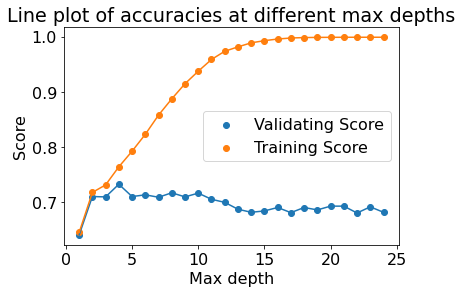

In [13]:
depth = range(1, 25)
validate_results = list()
training_results = list()
for i in depth:
    model = DecisionTreeClassifier(max_depth = i)
    cv_result = pd.DataFrame(cross_validate(model, X_train, y_train, cv = 10, return_train_score = True))
    validate_results = validate_results + list({np.mean(cv_result['test_score'])})
    training_results = training_results + list({np.mean(cv_result['train_score'])})

results = pd.DataFrame({'depth' : depth, 
                        'validate_score': validate_results, 
                        'training_score' :training_results})
print(results)
plt.scatter(x = depth, y = validate_results, label = "Validating Score")
plt.plot(depth, validate_results)
plt.scatter(x = depth, y = training_results, label = "Training Score")
plt.plot(depth, training_results)
plt.legend(loc = "center right")
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.title("Line plot of accuracies at different max depths")
plt.show()

**From the plot, as max depth increases, training score increases, but validating score starts with a upward trend (from depths 1-4) followed by a slow downward trend (4 onwards). From these results, I would choose max_depth of 4 as the optimal depth as it has the highest validating score. I believe that the depth I selected will do a decently good job at generalizing other spotify datasets (accuracy of ~0.73). This means that the model correctly predicted approximately 3 out of 4 validating features to targets. However, it is likely that the accuracy score for new data is lower as the training data does not contain a large amount of data to generate the model, so a higher score is definitely better.**

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [14]:
depth = 4
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X_train, y_train)
model.score(X_test, y_test)
print("The test score is %f" %model.score(X_test, y_test))

The test score is 0.693069


**The test score is ~0.693 which is less than the cross-validation score of ~0.73 at depth 4 from exercise 3. Typically, test scores are lower than cross-validation scores because the testing data isn't seen by the model when it is being trained where as the cross-validation score contains data that was exposed to the model during cross validation.**

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

**ANSWERS:**
1. Assuming that -1 means false and +1 means true: 
    - True cases: 2
    - False cases: 5, 4, 10, 9, 9
2. The training accuracy would be 1/6 which is 0.16667.
3. We will not be able get 100% accuracy with a single decision stump in this example

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 